# 1) Objective

Quoting the right fare to customers before starting the trip has been a challenge for various cab operators because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted.

Objective: To address this problem, a Cab operator wants to a build machine learning model for predicting the optimal trip fare based on useful features of the trip.

# 2) Data Description

The data set includes the following variables:
* trip_duration: Duration of Journey [in Seconds]
* distance_traveled: Distance travelled by taxi [in Km]
* num_of_passengers: Number of passengers were in the taxi.
* tip: Tip received by driver [In INR]
* miscellaneous_fees: Any additional charges during the trip - e.g. tolls, convenience fees, GST etc.[In INR]
* surge_applied: Was there a surge pricing applied? Yes, No
* Total fare: fare for the journey

Data Source: Open Source

# 3) Importing necessary libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_log_error
import warnings
warnings.filterwarnings("ignore")

# 4) Importing Data

In [218]:
data= pd.read_csv("C:/Users/tanmo/Desktop/Regression Project/data.csv")

# 5) Data Preprocessing and Understanding

In [219]:
#Checking number of duplicate values
data.duplicated().sum()

127

In [220]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [221]:
#Rechecking  number of for duplicate values
data.duplicated().sum()

0

In [222]:
# Looking into data
data.head()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied,total_fare
0,748,2.75,1,24,6.300,No,105.300
1,1187,3.43,1,24,13.200,No,142.200
2,730,3.12,1,0,26.625,Yes,97.875
3,671,5.63,3,0,9.750,No,99.750
4,329,2.09,1,12,13.200,No,70.200


In [223]:
# Checking number of rows and columns in dataset.
data.shape

(29873, 7)

In [224]:
# Checking basic info of features present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29873 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       29873 non-null  int64  
 1   distance_traveled   29873 non-null  float64
 2   num_of_passengers   29873 non-null  int64  
 3   tip                 29873 non-null  int64  
 4   miscellaneous_fees  29873 non-null  float64
 5   surge_applied       29873 non-null  object 
 6   total_fare          29873 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.8+ MB


# 6) EDA

### 6.1) Viewing overall description of data and checking errorneous data

In [225]:
# Basic description of numerical columns
data.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,1180.508553,4.772011,1.291467,13.111907,15.137304,127.540198
std,4847.426299,4.947719,0.933465,20.724347,12.504019,94.256951
min,0.000000,0.020000,0.000000,0.000000,-0.500000,0.000000
25%,444.000000,1.930000,1.000000,0.000000,6.000000,70.200000
50%,702.000000,3.190000,1.000000,9.000000,9.750000,101.625000
75%,1099.000000,5.680000,1.000000,20.000000,26.450000,152.250000
max,86309.000000,108.920000,9.000000,950.000000,230.875000,2760.375000


From the above table, we can see some errorneous or insignificant data, which are records with total_fare as zero, trip_duartion as zero, num_of_passesngers as zero and negative miscellaneous_fees as price cannot be in negative. Therefore we need to drop these records.

In [226]:
# Dropping errorneous or insignificant data
data=data[(data['miscellaneous_fees']>=0)&(data['trip_duration']>0)&(data['total_fare']>0)&(data['num_of_passengers']>0)]

In [227]:
# Rechecking basic description of numerical columns
data.describe()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare
count,29711.000000,29711.000000,29711.000000,29711.000000,29711.000000,29711.000000
mean,1182.409781,4.772482,1.297499,13.107570,15.137081,127.591093
std,4860.256396,4.945751,0.931758,20.735672,12.491868,94.157686
min,1.000000,0.020000,1.000000,0.000000,0.000000,1.125000
25%,444.000000,1.930000,1.000000,0.000000,6.000000,70.200000
50%,702.000000,3.190000,1.000000,9.000000,9.750000,101.625000
75%,1099.000000,5.700000,1.000000,20.000000,26.450000,152.250000
max,86309.000000,108.920000,9.000000,950.000000,230.875000,2760.375000


In [228]:
# Basic description of categorical columns
data.describe(include='object')

,surge_applied
count,29711
unique,2
top,No
freq,21366


### 6.2) Checking and handling missing values

In [229]:
# Checking missing values
data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
tip                   0
miscellaneous_fees    0
surge_applied         0
total_fare            0
dtype: int64

As there are no missing values, there is no need to handle missing values.

### 6.3) Univariate Analysis

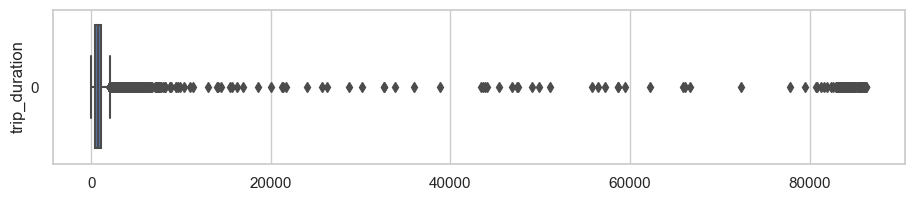

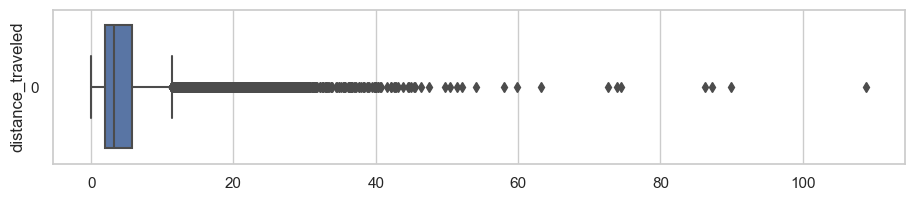

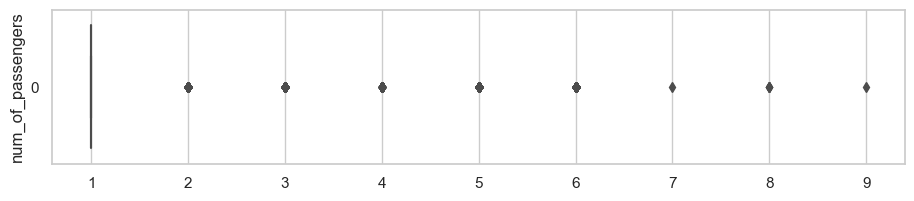

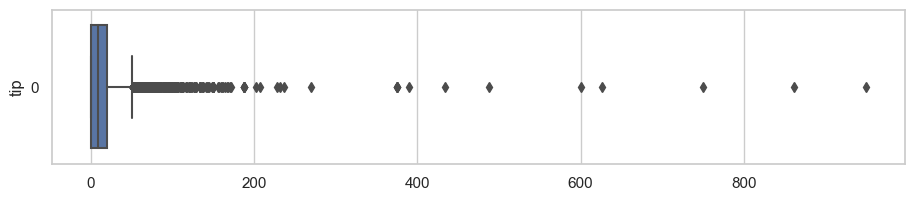

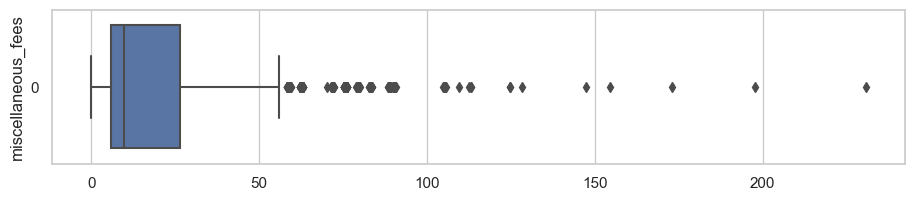

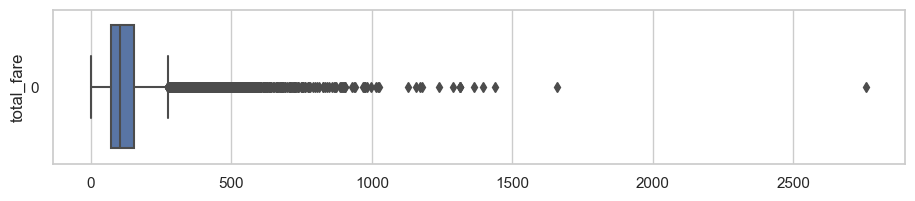

In [230]:
# Plotting box-plot to understand distribution of data
col=list(data.select_dtypes(include='number'))
for i in col:
    fig, ax = plt.subplots(figsize=(11,2))
    sns.boxplot(data=data[i], orient='h',ax=ax)
    plt.ylabel(i)
    plt.show()

From the above box plots we could infer that, the features are positively skewed and range of distribution is quite high.

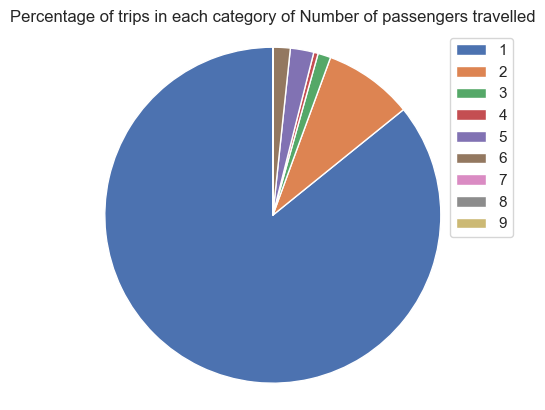

In [231]:
# Plotting pie charts
surge = data.groupby("num_of_passengers")['total_fare'].count().reset_index(name='count')
plt.pie(surge['count'],startangle=90)
plt.axis('equal')
plt.legend(labels=surge['num_of_passengers'], loc='best')
plt.title('Percentage of trips in each category of Number of passengers travelled')
plt.show()

From the above piechart we could infer that number of trips with number of passenger 1 is highest. 

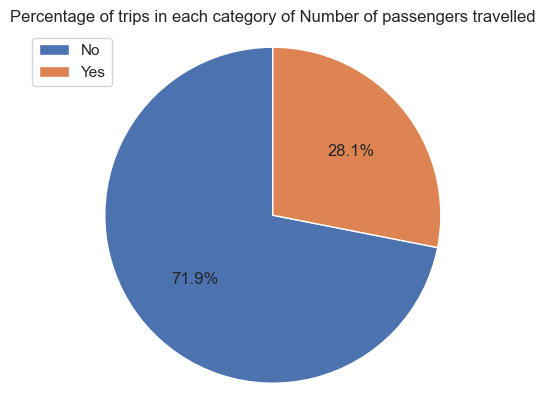

In [232]:
surge=data.groupby("surge_applied")['total_fare'].count().reset_index(name='total_fare')
plt.pie(surge['total_fare'],autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.legend(labels=surge['surge_applied'], loc='best')
plt.title('Percentage of trips in each category of Number of passengers travelled')
plt.show()

From the above piechart we could infer that in most number of trips surge fees were not applied. 

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

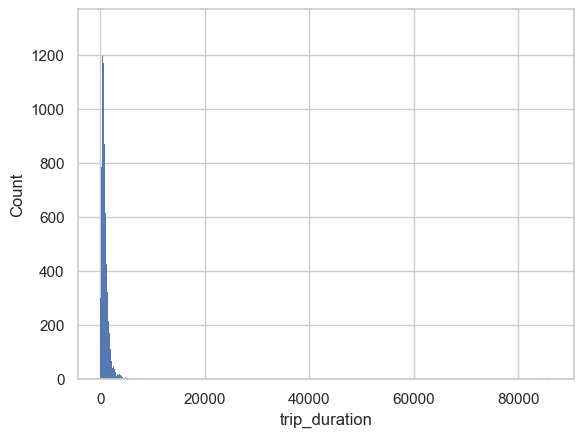

In [233]:
# Plotting Histogram of numerical variables
sns.histplot(data=data,x='trip_duration',alpha=1)

<AxesSubplot: xlabel='distance_traveled', ylabel='Count'>

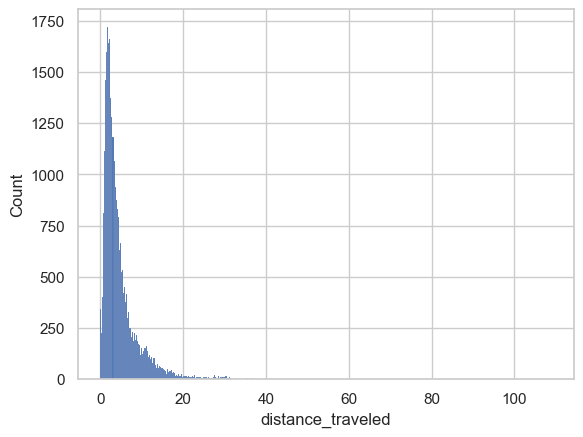

In [234]:
sns.histplot(data=data,x='distance_traveled',alpha=1)

<AxesSubplot: xlabel='num_of_passengers', ylabel='Count'>

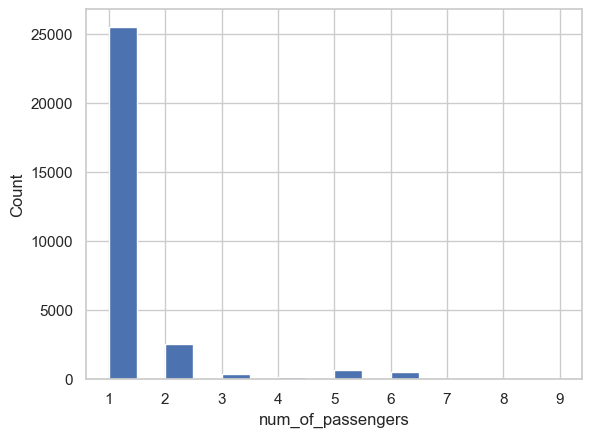

In [235]:
sns.histplot(data=data,x='num_of_passengers',alpha=1)

<AxesSubplot: xlabel='miscellaneous_fees', ylabel='Count'>

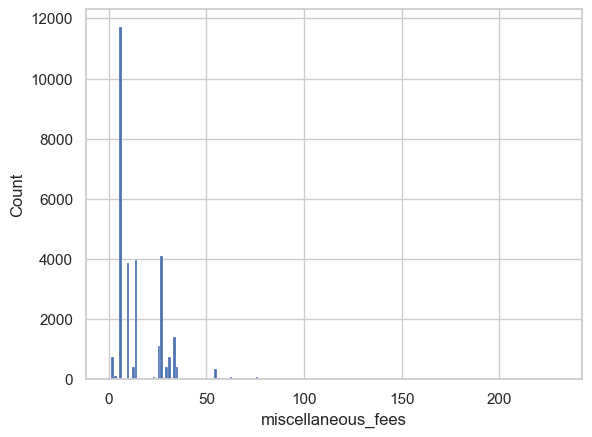

In [236]:
sns.histplot(data=data,x='miscellaneous_fees',alpha=1)

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

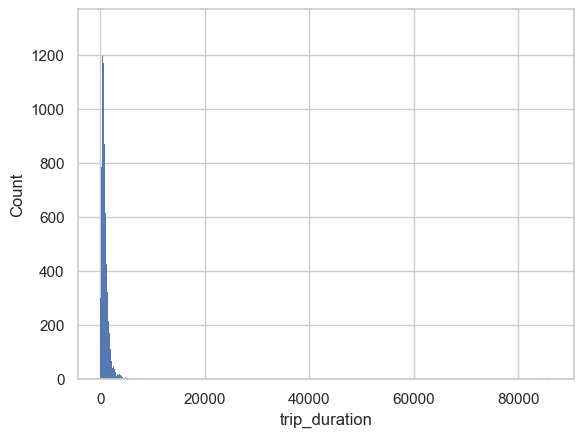

In [237]:
sns.histplot(data=data,x='trip_duration',alpha=1)

<AxesSubplot: xlabel='tip', ylabel='Count'>

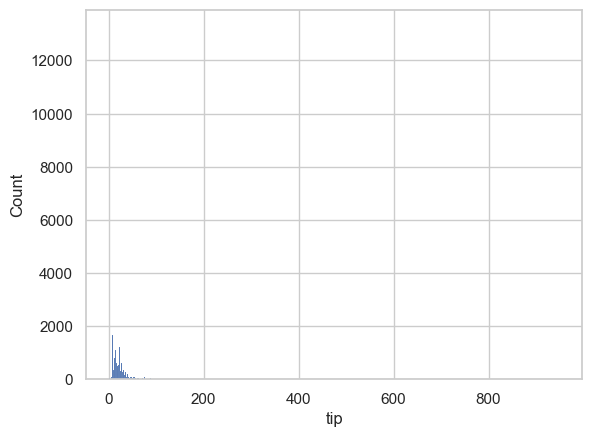

In [238]:
sns.histplot(data=data,x='tip',alpha= 1)

From the above histogram plots we could infer that all the features are right skewed.

### 6.4) Bivariate Analysis

(0.0, 88000.0)

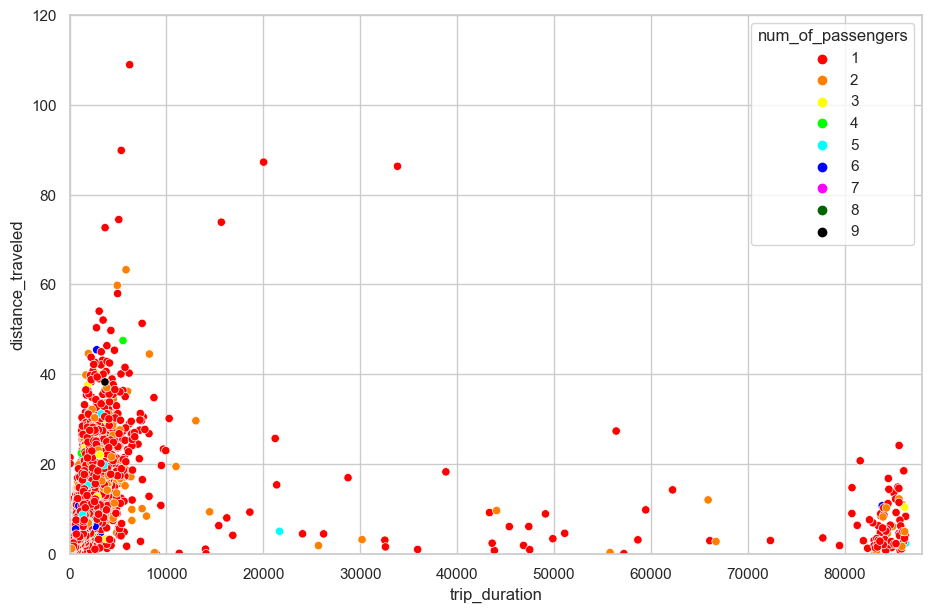

In [239]:
# Scatter plots
bright_palette = ["#FF0000", "#FF8000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF", "#006400",'#000000']
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["trip_duration"], y=data["distance_traveled"],hue=data['num_of_passengers'],palette=bright_palette, ax=ax)
ax.set_ylim(0, 120)
ax.set_xlim(0, 88000)

From the above scatter plot, we could infer that there were trips with high trip duration, but were relatively low distance travelled. This may happen due to breaks in journey.

(0.0, 88000.0)

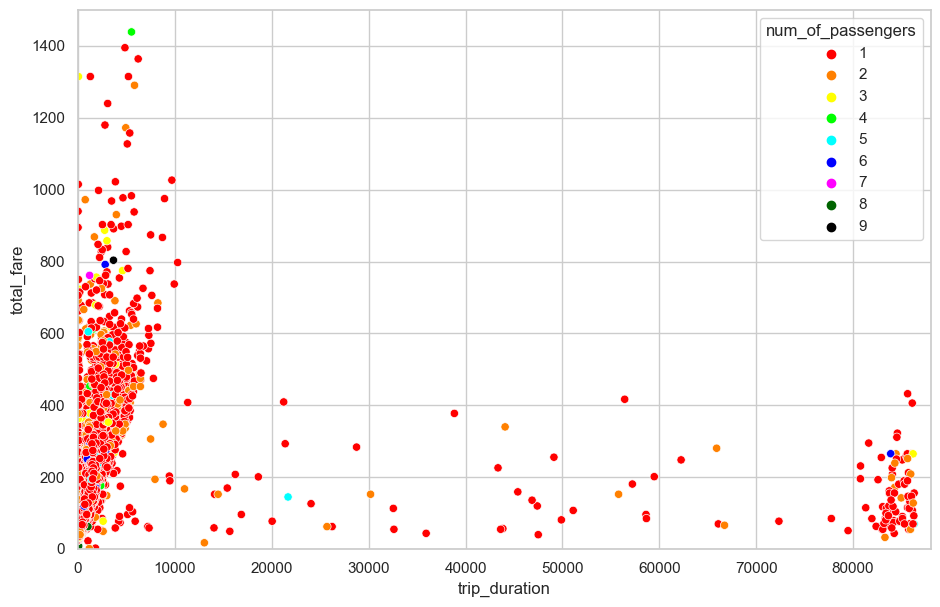

In [240]:
# Scatter plots
bright_palette = ["#FF0000", "#FF8000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF", "#006400",'#000000']
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["trip_duration"], y=data["total_fare"],hue=data['num_of_passengers'],palette=bright_palette, ax=ax)
ax.set_ylim(0, 1500)
ax.set_xlim(0, 88000)

From the above scatter plot, we could infer that there were trips with high trip duration, but were charged relatively low total fare. This may happen due to low distance travelled as we saw in previous scatter plot.

<AxesSubplot: xlabel='num_of_passengers', ylabel='total_fare'>

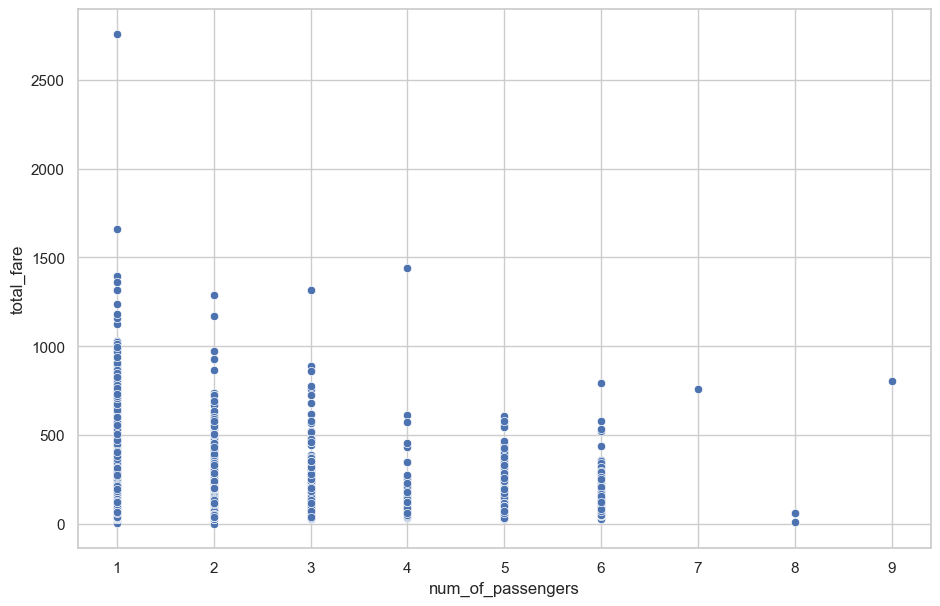

In [241]:
# Scatter plots
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["num_of_passengers"], y=data["total_fare"], ax=ax)

From the scatter plot we could infer highest bill amount is from a trip with number of passergers 1.

### 6.5) Handling categorical variable

In [242]:
# Encoding of Categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['surge_applied']=encoder.fit_transform(data['surge_applied'])

### 6.6) Checking multicollinearity

<AxesSubplot: >

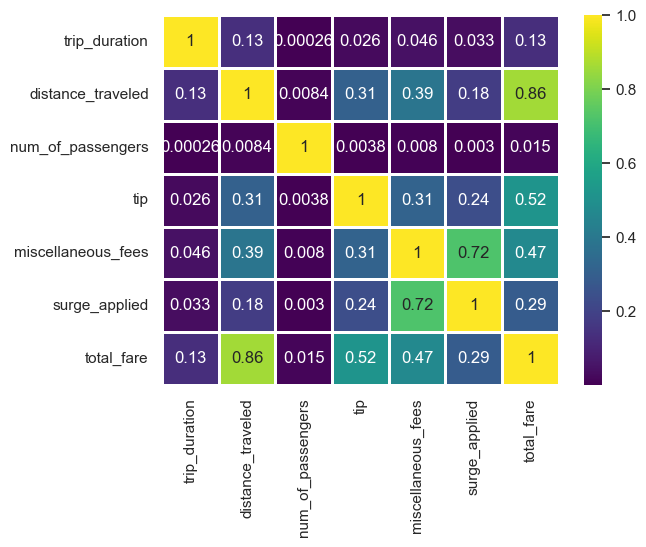

In [243]:
# Checking correlation between variables
Correlation=data.corr()
sns.heatmap(Correlation,cmap='viridis',annot=True,linewidth=2)

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = data[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees', 'surge_applied']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


              feature       VIF
0       trip_duration  1.075456
1   distance_traveled  2.408667
2   num_of_passengers  1.769659
3                 tip  1.619925
4  miscellaneous_fees  5.307121
5       surge_applied  2.933492


From the above correlation matrix and VIF results, we could see that there is no multicollinearity except 'miscellaneous_fees', which is showing very moderate multicollinearity among independent variables in the graph.

# 7) Model Building

### 7.1) Building base model

In [48]:
#Dividing dataset into feature set and target variable.
X=data.drop('total_fare',axis=1)
y=data[['total_fare']]

In [49]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=list(X.columns))
X_test= pd.DataFrame(scaler.transform(X_test),columns=list(X.columns))
y_train=pd.DataFrame(y_train,columns=y.columns).reset_index(drop=True)
y_test=pd.DataFrame(y_test,columns=y.columns).reset_index(drop=True)

In [51]:
# Building statiscal model using OLS
import statsmodels.api as sm
x = sm.add_constant(X_train)

# fitting linear regression model
model = sm.OLS(y_train,x)

# view model summary
print(model.fit().summary())

# Predicting on test data
y = sm.add_constant(X_test)
y_pred = model.fit().predict(y)

# Checking RMLSE and r2_score
print(f"Test RMSLE using OLS:", round(np.sqrt(mean_squared_log_error(y_test,y_pred)),3))
print(f"Test R-squared using OLS is : ",round(r2_score(y_test,y_pred),3),"\n")

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.848e+04
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:15:28   Log-Likelihood:            -1.2176e+05
No. Observations:               23870   AIC:                         2.435e+05
Df Residuals:                   23863   BIC:                         2.436e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.1719      0

In [52]:
# Building other machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True,n_jobs=-1):'Random Forest',
    AdaBoostRegressor():'AdaBoost'
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    #Predicting on training data
    y_pred_train=model.predict(X_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    # Checking Train - RMLSE and r2_score
    train_rmsle=np.sqrt(mean_squared_log_error(y_train,y_pred_train))
    print(f"Training RMSLE using {name} is :", round(train_rmsle,3))
    print(f"Training R-squared using {name} is : ",round(r2_score(y_train,y_pred_train),3))
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3))
    print(f"Test R-squared using {name} is : ",round(r2_score(y_test,y_pred_test),3),"\n")

Training RMSLE using KNN is : 0.119
Training R-squared using KNN is :  0.898
Test RMSLE using KNN is : 0.148
Test R-squared using KNN is :  0.858 

Training RMSLE using Decision Tree is : 0.017
Training R-squared using Decision Tree is :  0.999
Test RMSLE using Decision Tree is : 0.173
Test R-squared using Decision Tree is :  0.753 

Training RMSLE using Random Forest is : 0.072
Training R-squared using Random Forest is :  0.978
Test RMSLE using Random Forest is : 0.13
Test R-squared using Random Forest is :  0.878 

Training RMSLE using AdaBoost is : 0.585
Training R-squared using AdaBoost is :  0.48
Test RMSLE using AdaBoost is : 0.579
Test R-squared using AdaBoost is :  0.42 



From Test RMSLE and Test R-squared values of each of the model, we could infer KNN, Decision Tree and Random Forest is giving better result on test data than OLS and AdaBoost. Now, we will try increasing the performance of KNN, Decision Tree and Random Forest.

### 7.2) Skewness treatment

In [53]:
# Checking skewness in target variable
from scipy.stats import skew
skew(y_train)

array([4.23509904])

In [54]:
# Transforming target variable of training data
y_train=np.log(y_train)

In [55]:
# Rechecking skewness after transformation
from scipy.stats import skew
skew(y_train)

array([0.426037])

In [252]:
# Building model after skewness treatment
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True,n_jobs=-1):'Random Forest',
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    #Predicting on training data
    y_pred_train=model.predict(X_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    y_pred_test=np.exp(y_pred_test)
    # Checking Train - RMLSE and r2_score
    train_rmsle=np.sqrt(mean_squared_log_error(y_train,y_pred_train))
    print(f"Training RMSLE using {name} is :", round(train_rmsle,3))
    print(f"Training R-squared using {name} is : ",round(r2_score(y_train,y_pred_train),3))
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3))
    print(f"Test R-squared using {name} is : ",round(r2_score(y_test,y_pred_test),3),"\n")

Training RMSLE using KNN is : 0.023
Training R-squared using KNN is :  0.96
Test RMSLE using KNN is : 0.137
Test R-squared using KNN is :  0.862 

Training RMSLE using Decision Tree is : 0.003
Training R-squared using Decision Tree is :  0.999
Test RMSLE using Decision Tree is : 0.157
Test R-squared using Decision Tree is :  0.801 

Training RMSLE using Random Forest is : 0.011
Training R-squared using Random Forest is :  0.992
Test RMSLE using Random Forest is : 0.123
Test R-squared using Random Forest is :  0.883 



From the Test RMSLE and Test R-squared values we could infer that model performance has increased after skewness treatment.

### 7.3) Feature Selection

In [253]:
# Feature Selection using RFECV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
# Initialize the RFECV object with the model and desired scoring metric
rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error',cv=10)

# Fit the RFECV object to the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: {}".format(rfecv.n_features_))

# Print the selected features
print("Selected features: {}".format(X_train.columns[rfecv.support_]))


Optimal number of features: 5
Selected features: Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees'],
      dtype='object')


In [254]:
X_train=X_train[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees']]
X_test=X_test[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees']]

In [255]:
# Building model using selected features
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True,n_jobs=-1):'Random Forest',
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    #Predicting on training data
    y_pred_train=model.predict(X_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    y_pred_test=np.exp(y_pred_test)
    # Checking Train - RMLSE and r2_score
    train_rmsle=np.sqrt(mean_squared_log_error(y_train,y_pred_train))
    print(f"Training RMSLE using {name} is :", round(train_rmsle,3))
    print(f"Training R-squared using {name} is : ",round(r2_score(y_train,y_pred_train),3))
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3))
    print(f"Test R-squared using {name} is : ",round(r2_score(y_test,y_pred_test),3),"\n")

Training RMSLE using KNN is : 0.023
Training R-squared using KNN is :  0.96
Test RMSLE using KNN is : 0.137
Test R-squared using KNN is :  0.864 

Training RMSLE using Decision Tree is : 0.003
Training R-squared using Decision Tree is :  0.999
Test RMSLE using Decision Tree is : 0.158
Test R-squared using Decision Tree is :  0.79 

Training RMSLE using Random Forest is : 0.011
Training R-squared using Random Forest is :  0.992
Test RMSLE using Random Forest is : 0.123
Test R-squared using Random Forest is :  0.884 



From the RMSLE values we could infer that model performance has almost remained same after feature selection which shows model has been able to produce same results using less features. Now, we will look into tuning the hyper parameters of the models.

### 7.4) Hyper parameter tuning using optuna

In [58]:
# Hyper parameter tuning of KNN
import optuna
from sklearn.neighbors import KNeighborsRegressor
def objective(trial):
    # Defining the hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    # Training the KNN model    
    model = KNeighborsRegressor(
        n_neighbors=n_neighbors,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred=np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the hyper parameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", best_value)

[I 2023-06-23 02:28:43,769] A new study created in memory with name: no-name-16640f17-e2a7-4a8e-aa68-0e6536e406a7
[I 2023-06-23 02:28:44,107] Trial 0 finished with value: 0.16879137409015457 and parameters: {'n_neighbors': 77}. Best is trial 0 with value: 0.16879137409015457.
[I 2023-06-23 02:28:44,399] Trial 1 finished with value: 0.1755251905306957 and parameters: {'n_neighbors': 94}. Best is trial 0 with value: 0.16879137409015457.
[I 2023-06-23 02:28:44,664] Trial 2 finished with value: 0.16512344580041355 and parameters: {'n_neighbors': 68}. Best is trial 2 with value: 0.16512344580041355.
[I 2023-06-23 02:28:44,877] Trial 3 finished with value: 0.14639447704993766 and parameters: {'n_neighbors': 27}. Best is trial 3 with value: 0.14639447704993766.
[I 2023-06-23 02:28:45,196] Trial 4 finished with value: 0.17453779534553307 and parameters: {'n_neighbors': 92}. Best is trial 3 with value: 0.14639447704993766.
[I 2023-06-23 02:28:45,472] Trial 5 finished with value: 0.1655638043631

[I 2023-06-23 02:28:54,627] Trial 50 finished with value: 0.15506020404454268 and parameters: {'n_neighbors': 44}. Best is trial 21 with value: 0.133963513523394.
[I 2023-06-23 02:28:54,808] Trial 51 finished with value: 0.13434996946213737 and parameters: {'n_neighbors': 10}. Best is trial 21 with value: 0.133963513523394.
[I 2023-06-23 02:28:55,015] Trial 52 finished with value: 0.13794762918614278 and parameters: {'n_neighbors': 15}. Best is trial 21 with value: 0.133963513523394.
[I 2023-06-23 02:28:55,208] Trial 53 finished with value: 0.13468318168509671 and parameters: {'n_neighbors': 11}. Best is trial 21 with value: 0.133963513523394.
[I 2023-06-23 02:28:55,374] Trial 54 finished with value: 0.13733040103606248 and parameters: {'n_neighbors': 5}. Best is trial 21 with value: 0.133963513523394.
[I 2023-06-23 02:28:55,572] Trial 55 finished with value: 0.13849921715432206 and parameters: {'n_neighbors': 16}. Best is trial 21 with value: 0.133963513523394.
[I 2023-06-23 02:28:55,

Best Params: {'n_neighbors': 9}
Best Value: 0.133963513523394


In [62]:
# Hyper parameter tuning of Decision Tree model
import optuna
from sklearn.tree import DecisionTreeRegressor
def objective(trial):
    # Defining the hyperparameters to tune
    max_depth= trial.suggest_int('max_depth', 3, 100)
    min_samples_split= trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf= trial.suggest_int('min_samples_leaf', 1, 5)
    max_features= trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    # Training the Decision Tree model
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
    )

    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred=np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the best hyperparameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", best_value)

[I 2023-06-23 02:30:33,655] A new study created in memory with name: no-name-69adba40-b6c8-49bf-812e-2b7c77bde210
[I 2023-06-23 02:30:33,691] Trial 0 finished with value: 0.1452117077546856 and parameters: {'max_depth': 69, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.1452117077546856.
[I 2023-06-23 02:30:33,767] Trial 1 finished with value: 0.14118786875889533 and parameters: {'max_depth': 83, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 1 with value: 0.14118786875889533.
[I 2023-06-23 02:30:33,847] Trial 2 finished with value: 0.15347632956532964 and parameters: {'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 1 with value: 0.14118786875889533.
[I 2023-06-23 02:30:33,889] Trial 3 finished with value: 0.1340832289787515 and parameters: {'max_depth': 74, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is tr

[I 2023-06-23 02:30:35,772] Trial 35 finished with value: 0.14511761919102167 and parameters: {'max_depth': 37, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.1340832289787515.
[I 2023-06-23 02:30:35,830] Trial 36 finished with value: 0.15303839328097427 and parameters: {'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.1340832289787515.
[I 2023-06-23 02:30:35,895] Trial 37 finished with value: 0.1648947977783664 and parameters: {'max_depth': 55, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.1340832289787515.
[I 2023-06-23 02:30:36,008] Trial 38 finished with value: 0.15915880862990844 and parameters: {'max_depth': 86, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 3 with value: 0.1340832289787515.
[I 2023-06-23 02:30:36,058] Trial 39 finished with value: 0.139957041806

[I 2023-06-23 02:30:38,075] Trial 71 finished with value: 0.1583835287085508 and parameters: {'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.12839625742097274.
[I 2023-06-23 02:30:38,135] Trial 72 finished with value: 0.13880149395788643 and parameters: {'max_depth': 58, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.12839625742097274.
[I 2023-06-23 02:30:38,197] Trial 73 finished with value: 0.1486204749428425 and parameters: {'max_depth': 58, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.12839625742097274.
[I 2023-06-23 02:30:38,259] Trial 74 finished with value: 0.15597380334307173 and parameters: {'max_depth': 34, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 40 with value: 0.12839625742097274.
[I 2023-06-23 02:30:38,317] Trial 75 finished with value: 0.148493

Best Params: {'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Best Value: 0.12839625742097274


In [56]:
# Hyper parameter tuning of Random Forest
import optuna
from sklearn.ensemble import RandomForestRegressor
def objective(trial):
    # Defining the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000,step=50)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split= trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf= trial.suggest_int('min_samples_leaf', 1, 5)
    max_features= trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    # Training the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        oob_score=True,
        n_jobs=-1,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
    )

    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred=np.exp(y_pred)
    # Calculating the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Creating an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Printing the best hyperparameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", round(best_value,3))

[I 2023-06-23 02:15:42,659] A new study created in memory with name: no-name-0f0ea736-7f31-46a0-9022-bde633da167f
[I 2023-06-23 02:15:48,468] Trial 0 finished with value: 0.1206477872901842 and parameters: {'n_estimators': 950, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.1206477872901842.
[I 2023-06-23 02:15:51,027] Trial 1 finished with value: 0.11964221814116031 and parameters: {'n_estimators': 200, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'auto'}. Best is trial 1 with value: 0.11964221814116031.
[I 2023-06-23 02:15:53,088] Trial 2 finished with value: 0.16713204743405558 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.11964221814116031.
[I 2023-06-23 02:15:57,488] Trial 3 finished with value: 0.11450163029565533 and parameters: {'n_estimators': 650, 'max_depth': 12,

[I 2023-06-23 02:18:45,787] Trial 32 finished with value: 0.11180707559756609 and parameters: {'n_estimators': 550, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 32 with value: 0.11180707559756609.
[I 2023-06-23 02:18:51,080] Trial 33 finished with value: 0.11168684107583236 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.11168684107583236.
[I 2023-06-23 02:18:56,080] Trial 34 finished with value: 0.11205180961875603 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.11168684107583236.
[I 2023-06-23 02:19:05,688] Trial 35 finished with value: 0.11888260018815082 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 33 with value: 0

[I 2023-06-23 02:20:30,314] Trial 65 finished with value: 0.11214373891426262 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.11122316913853732.
[I 2023-06-23 02:20:34,281] Trial 66 finished with value: 0.11218995393989463 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.11122316913853732.
[I 2023-06-23 02:20:37,497] Trial 67 finished with value: 0.1128402999410411 and parameters: {'n_estimators': 400, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.11122316913853732.
[I 2023-06-23 02:20:42,292] Trial 68 finished with value: 0.11757084166501351 and parameters: {'n_estimators': 300, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}. Best is trial 37 with value: 

[I 2023-06-23 02:23:25,758] Trial 98 finished with value: 0.11196098131517626 and parameters: {'n_estimators': 100, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 74 with value: 0.11111063373232855.
[I 2023-06-23 02:23:29,638] Trial 99 finished with value: 0.11267239195585581 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 74 with value: 0.11111063373232855.


Best Params: {'n_estimators': 700, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best Value: 0.111


### 7.5) Final model building using tuned hyper parameters.

In [69]:
# Building model after skewness treatment
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    KNeighborsRegressor(n_neighbors=9):'KNN',
    DecisionTreeRegressor(max_depth= 28,min_samples_split= 9, min_samples_leaf= 3, max_features='sqrt'):'Decision Tree',
    RandomForestRegressor(n_estimators= 700, max_depth=13, min_samples_split=10, min_samples_leaf= 1, max_features='sqrt',oob_score=True,n_jobs=-1):'Random Forest'
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    y_pred_test=np.exp(y_pred_test)
    #Checking Test - RMLSE and r2_score
    test_rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred_test))
    print(f"Test RMSLE using {name} is :", round(test_rmsle,3))
    print(f"Test R-squared using {name} is : ",round(r2_score(y_test,y_pred_test),3),"\n")

Test RMSLE using KNN is : 0.134
Test R-squared using KNN is :  0.855 

Test RMSLE using Decision Tree is : 0.149
Test R-squared using Decision Tree is :  0.816 

Test RMSLE using Random Forest is : 0.112
Test R-squared using Random Forest is :  0.88 



<b>Conclusion:</b> From the above results of Hyper parameter tuning of the above three models, it can be conculded that Random Forest Regressor is able to predict the fares better than all the models as the RMSLE score of 0.112 suggests that, on average, the Random Forest model's predictions have a relatively low logarithmic error in predicting the fares, which the lowest among all the models and the R-squared score of 0.88 suggests that approximately 88% of the variance in the dependent variable can be explained by the Random Forest Regressor model's predictions which is the highest among all the models. Therefore, we will select the Random Forest Model as our final model for predicting the fare of a trip.

### 7.6) Feature Importance

In [79]:
model=RandomForestRegressor(n_estimators= 700, max_depth=13, min_samples_split=10, min_samples_leaf= 1, max_features='sqrt',oob_score=True,n_jobs=-1)
model.fit(X_train,y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nTop 2 features contributing to prediction of Cab Fare:\n")
for i in range(X_train.shape[1]-4):
    print(f"Feature '{X_train.columns[indices[i]]}': {round(importances[indices[i]],3)}")


Top 2 features contributing to prediction of Cab Fare:

Feature 'distance_traveled': 0.415
Feature 'trip_duration': 0.312


Distance Travelled and Trip Duration are the top two features contributing to predicting the fare of trip.